## Problem Statement

Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
%matplotlib inline

In [63]:
from sklearn.datasets import load_boston

boston = load_boston()

In [64]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [65]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [66]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
bos = pd.DataFrame(boston.data)

In [68]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
bos.shape

(506, 13)

In [70]:
bos.columns = boston.feature_names

In [71]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [72]:
bos['Price'] = boston.target

In [73]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
bos.shape

(506, 14)

In [74]:
X = bos.iloc[:,:-1].values

In [77]:
X.shape

(506, 13)

In [78]:
y = bos.iloc[:,13].values

In [79]:
y.shape

(506,)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [106]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', y_train.shape)
print('Y_test: ', y_test.shape)

X_train:  (404, 13)
X_test:  (102, 13)
Y_train:  (404,)
Y_test:  (102,)


In [107]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
y_pred = lm.predict(X_test)

In [134]:
ActualvsPred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [135]:
print(ActualvsPred.head())

   Actual  Predicted
0    22.6  24.889638
1    50.0  23.721411
2    23.0  29.364999
3     8.3  12.122386
4    21.2  21.443823


In [139]:
print(ActualvsPred.tail())

     Actual  Predicted
97     24.7  25.442171
98     14.1  15.571783
99     18.7  17.937195
100    28.1  25.305888
101    19.8  22.373233


<function matplotlib.pyplot.show(*args, **kw)>

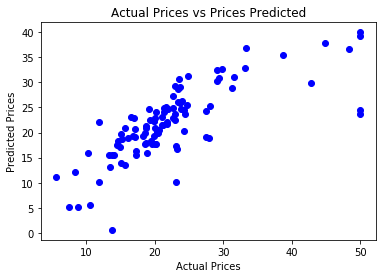

In [138]:
plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Prices Predicted')
plt.show

In [125]:
print(lm.coef_)

[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [140]:
print(lm.intercept_)

38.091694926302004


In [141]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print('R Sqaured Score of the Test data is: ', score)

R Sqaured Score of the Test data is:  0.5892223849182534


In [143]:
print('Mean Absolute Error (MAE) of Test data is: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE) of Test data is: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE) of Test data is: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error (MAE) of Test data is:  3.8429092204444912
Mean Squared Error (MSE) of Test data is:  33.44897999767632
Root Mean Squared Error (RMSE) of Test data is:  5.783509315085117


In [144]:
## The R2 Score of 0.58922 is low, therefore our model is not very accurate at predicting the
## house prices based on the data provided.